# Information and Network Security - INS

Team Project - Section - 030

Padmini Aripirala - 999903261

Keerthi Reddy Chimalapati - 999903554

Sai Kiran Duvvuri - 999902946

Package Installation: Installs necessary packages (scipy, seaborn, tensorflow, tensorflow-io) using pip.

In [6]:
# Install necessary packages using pip
!pip install scipy
!pip install seaborn
!pip install tensorflow==2.12.0 tensorflow-io==0.29.0


Package Importing: Imports required packages (pandas, numpy, tensorflow, matplotlib.pyplot, seaborn, LabelEncoder) for data manipulation, analysis, and visualization.

In [4]:
# Import the installed packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
data = pd.read_csv("/content/drebin-215-dataset-5560malware-9476-benign.csv",encoding="utf-8", low_memory=False, na_values="?")
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [10]:
df = pd.read_csv("/content/dataset-features-categories.csv")
df.head()

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


Preprocesses the data by replacing class labels, finding categorical columns, and splitting it into features and target variable.



In [13]:
data.dtypes

transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
ACCESS_FINE_LOCATION           int64
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
Length: 216, dtype: object

Performs data visualization to explore the dataset:

In [14]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data


[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [15]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


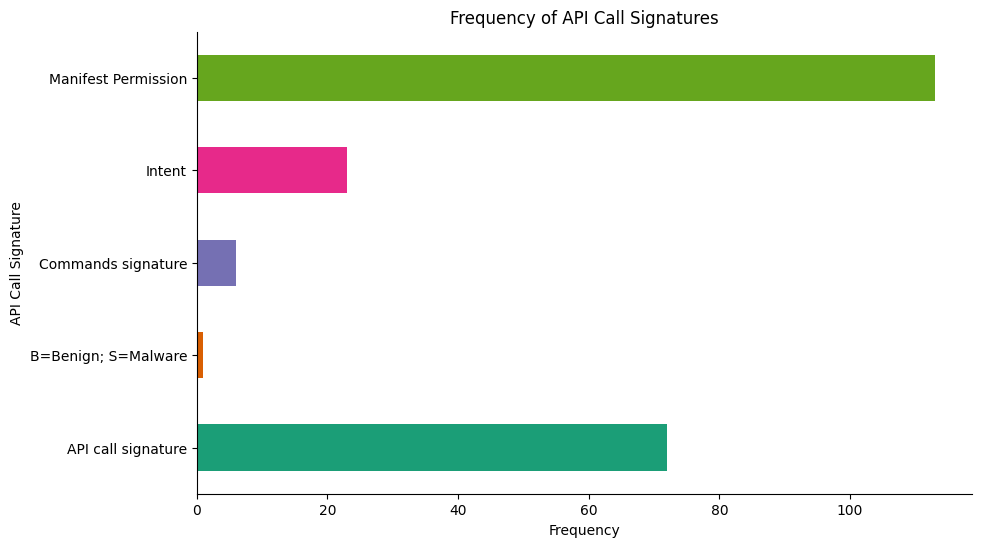

In [16]:
# Visualization 1: Bar plot of API call signatures frequency
plt.figure(figsize=(10, 6))
df.groupby('API call signature').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Frequency of API Call Signatures')
plt.xlabel('Frequency')
plt.ylabel('API Call Signature')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

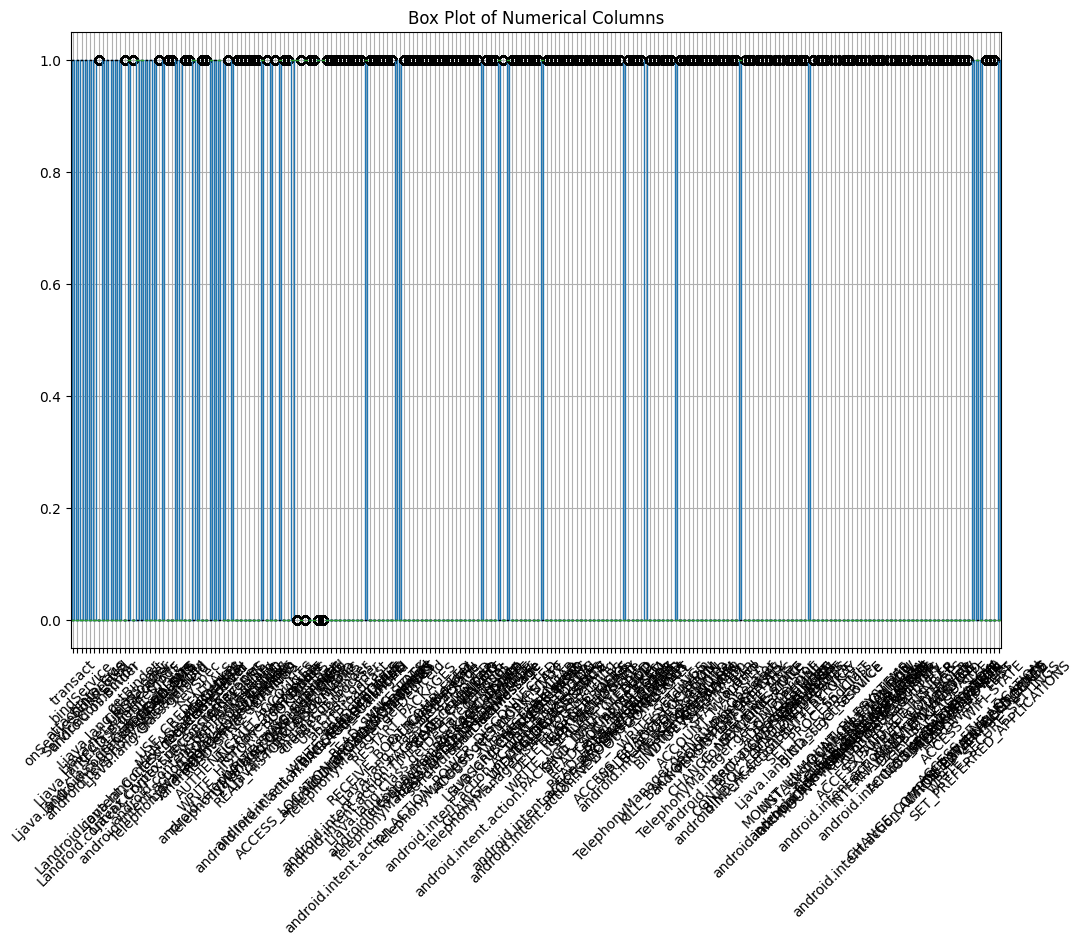

In [17]:
# Visualization 2: Box plot of numerical columns in data
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


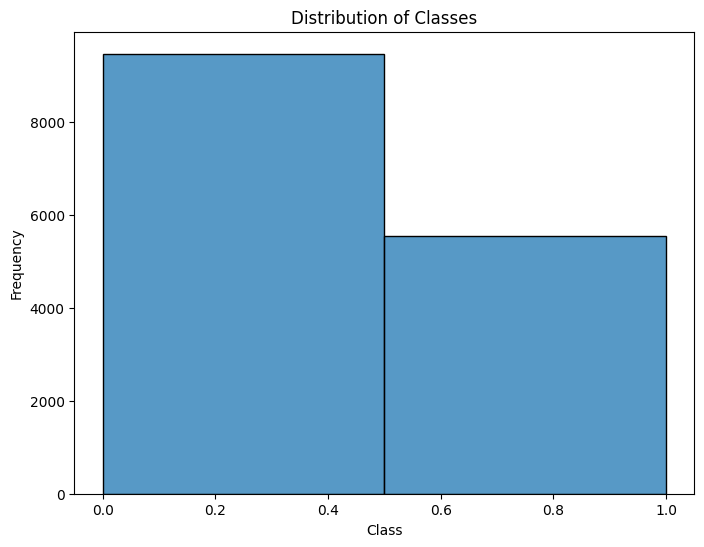

In [18]:
# Visualization 3: Histogram of class distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['class'], bins=2, kde=False)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


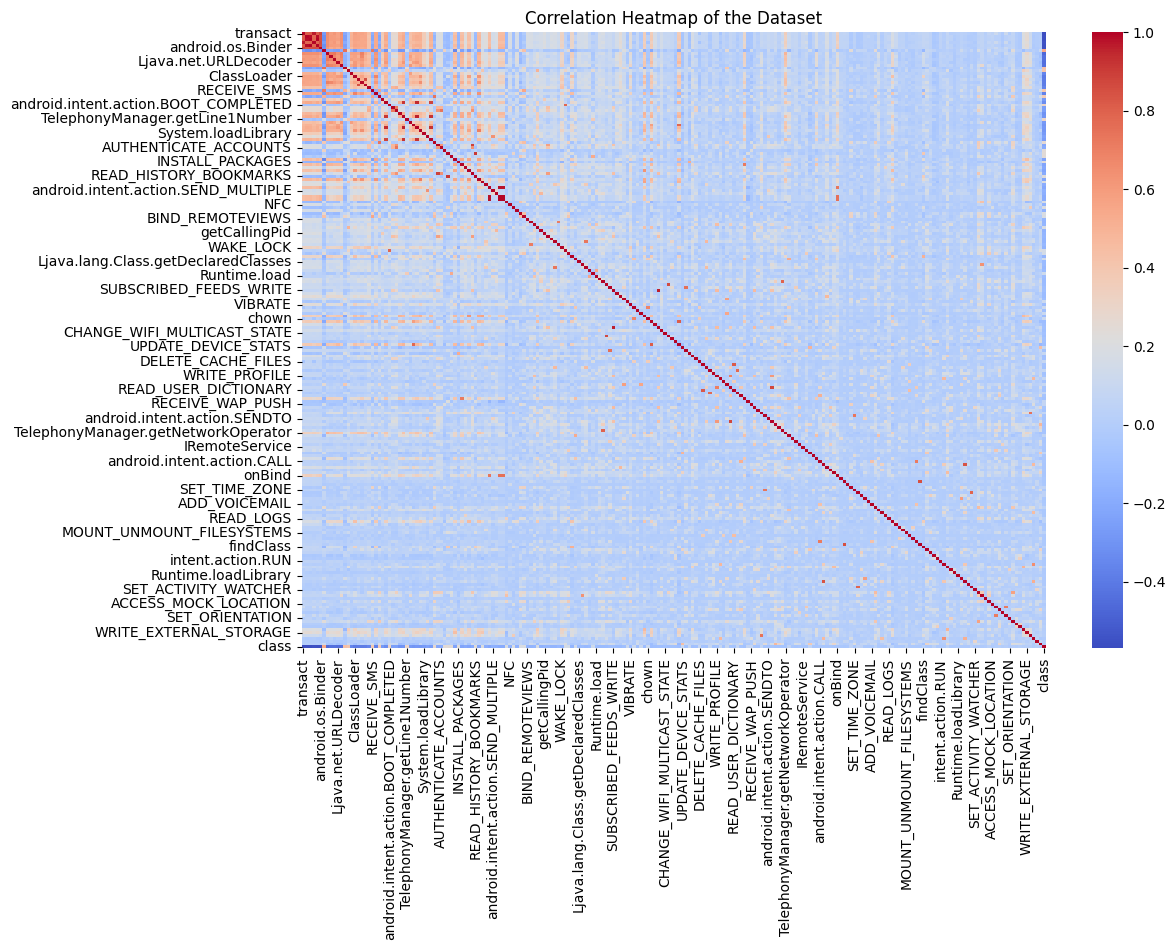

In [19]:
# Visualization 4: Correlation heatmap of the dataset
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()



In [20]:
#Dataset Columns
print(data.columns)

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)


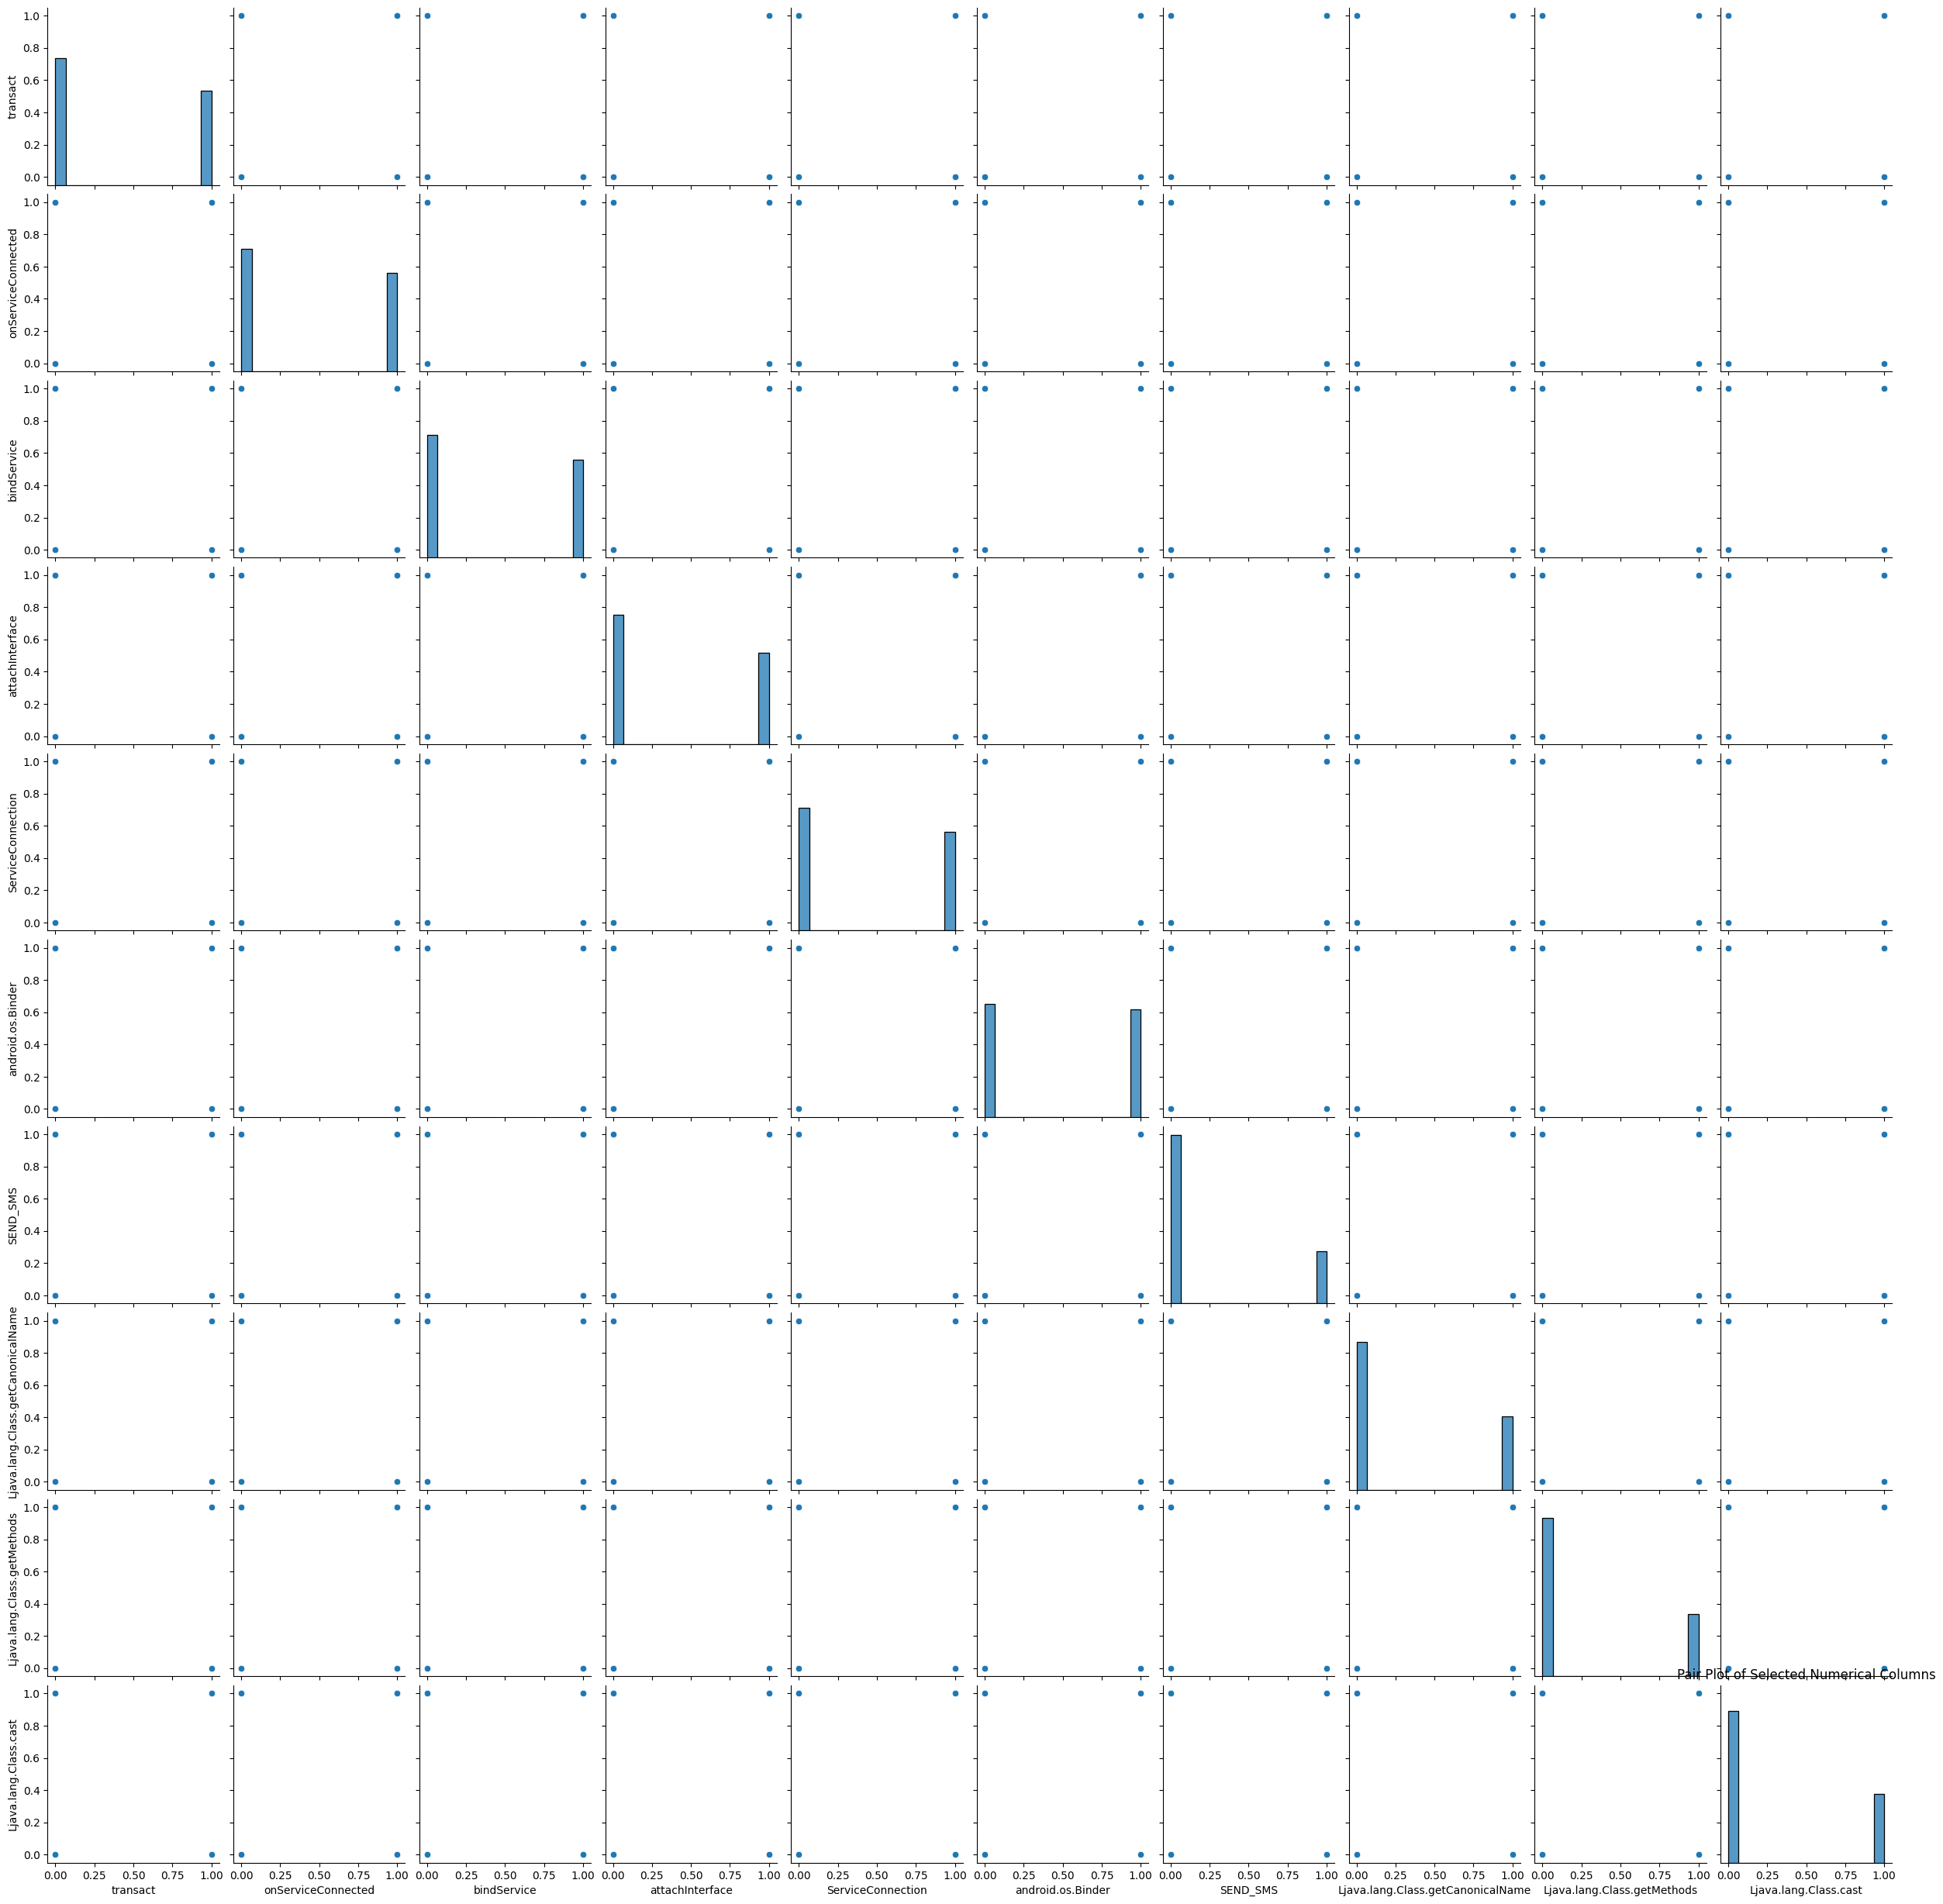

In [21]:
# Visualization 5: Pair plot of selected numerical columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

# Replace with provided column names
sns.pairplot(data[selected_columns])
plt.title('Pair Plot of Selected Numerical Columns')
plt.show()

In [ ]:
#Reference : https://www.kaggle.com/code/tmleyncodes/malware-detection-using-dt-svm-lr-nn/notebook